Rachunek prawdopodobieństwa i statystyka 
Piotr Śmiałek 

Będę korzystał z API yfinance, która umożliwi mi pobieranie danych z yahoo
Wiecej informacji
https://pypi.org/project/yfinance/

In [1]:
!pip install yfinance


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: C:\Users\piotr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


Importowanie niezbędnych bibliotek

In [62]:
import yfinance as yf
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mplt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
%matplotlib inline

Importowanie danych

Do importowania danych z bazy użyję funkcji:

In [7]:
def import_data(symbol, database_name, data_intervals):
    data = yf.download(symbol, period="max", interval=data_intervals)
    conn = sqlite3.connect("./data/" + database_name)
    data.to_sql(name=symbol, con=conn , if_exists="replace", index=True)
    conn.close()

Za pomocą powyższej funkcji bedę mógł stworzyć 4 osobne zbiory danych dla firmy Microsoft, dla interwałów:
dniowego, tygodniowego, miesięcznego i kwartalnego.

In [8]:
import_data("MSFT", "microsoft_daily.db", "1d")
import_data("MSFT", "microsoft_weekly.db", "1wk")
import_data("MSFT", "microsoft_monthly.db", "1mo")
import_data("MSFT", "microsoft_quarterly.db", "3mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Poniższa funkcja umożliwi mi zapisanie danych z SQL do DataFrame.

In [9]:
def convert_to_dataframe(symbol,database_path):
    conn = sqlite3.connect(database_path)
    query = f"SELECT * FROM {symbol}"
    df = pd.read_sql(query, conn)
    conn.close()
    return df

Konwersja danych do DataFrame

In [12]:
df_microsoft_daily = convert_to_dataframe("MSFT", "./data/microsoft_daily.db")
df_microsoft_weekly = convert_to_dataframe("MSFT", "./data/microsoft_weekly.db")
df_microsoft_monthly = convert_to_dataframe("MSFT", "./data/microsoft_monthly.db")
df_microsoft_quarterly = convert_to_dataframe("MSFT", "./data/microsoft_quarterly.db")

Sprawdzenie poprawności wczytanych danych:

In [14]:
df_microsoft_daily.shape

(9524, 7)

In [15]:
df_microsoft_weekly.shape

(1973, 7)

In [16]:
df_microsoft_monthly.shape

(453, 7)

In [17]:
df_microsoft_quarterly.shape

(152, 7)

Każda z wczytanych tabel posiada 7 kolumn:
- Date

- Open - otwarcie to cena instrumentu finansowego (takiego jak akcje) w momencie otwarcia sesji handlowej na rynku. Oznacza to, ile jednostek waluty trzeba było zapłacić lub otrzymać w zamian za jednostkę instrumentu finansowego napoczątku sesji.

- High - najwyższa cena instrumentu finansowego osiągnięta w trakcie danego okresu czasu (np. jednej sesji handlowej). To jest największa wartość, którą osiągnęła cena w danym przedziale czasowym.

- Low - najniższa cena instrumentu finansowego osiągnięta w trakcie danego okresu czasu. To jest najmniejsza wartość, którą osiągnęła cena w danym przedziale czasowym.

- Close - cena instrumentu finansowego w momencie zamknięcia sesji handlowej. Oznacza to, ile jednostek waluty trzeba było zapłacić lub otrzymać w zamian za jednostkę instrumentu finansowego na końcu sesji.

- Adj Close - cena instrumentu finansowego w momencie zamknięcia sesji handlowej. Oznacza to, ile jednostek waluty trzeba było zapłacić lub otrzymać w zamian za jednostkę instrumentu finansowego na końcu sesji.

- Volume - wolumen to liczba jednostek instrumentu finansowego, które zostały wymienione w danym okresie czasu. Oznacza to, ile razy dany instrument finansowy został kupiony lub sprzedany w danym przedziale czasowym.

In [18]:
df_microsoft_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13 00:00:00,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14 00:00:00,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17 00:00:00,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18 00:00:00,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
4,1986-03-19 00:00:00,0.099826,0.100694,0.097222,0.098090,0.060812,47894400


In [19]:
df_microsoft_weekly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-10 00:00:00,0.088542,0.102431,0.088542,0.100694,0.062427,1339948800
1,1986-03-17 00:00:00,0.100694,0.103299,0.091146,0.092882,0.057583,367257600
2,1986-03-24 00:00:00,0.092882,0.096354,0.089410,0.096354,0.059736,136972800
3,1986-03-31 00:00:00,0.096354,0.098958,0.093750,0.096354,0.059736,100598400
4,1986-04-07 00:00:00,0.096354,0.101563,0.092882,0.099826,0.061889,70070400


In [20]:
df_microsoft_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-04-01 00:00:00,0.095486,0.121962,0.092882,0.111979,0.069423,547142400
1,1986-05-01 00:00:00,0.111979,0.123264,0.107639,0.121528,0.075343,333446400
2,1986-06-01 00:00:00,0.121528,0.121528,0.102431,0.106771,0.066194,293788800
3,1986-07-01 00:00:00,0.106771,0.109375,0.090278,0.098958,0.061350,460800000
4,1986-08-01 00:00:00,0.098958,0.106771,0.094618,0.098958,0.061350,266256000


In [21]:
df_microsoft_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-01 00:00:00,0.095486,0.123264,0.092882,0.121528,0.075343,880588800
1,1986-06-01 00:00:00,0.121528,0.121528,0.090278,0.098958,0.061350,1020844800
2,1986-09-01 00:00:00,0.098958,0.177951,0.091146,0.172743,0.107094,2904796800
3,1986-12-01 00:00:00,0.172743,0.276042,0.157118,0.266493,0.165216,4517395200
4,1987-03-01 00:00:00,0.266493,0.445313,0.255208,0.400174,0.248093,6093964800


Podstawowe informacje o wczytanych danych

In [23]:
df_microsoft_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9524 non-null   object 
 1   Open       9524 non-null   float64
 2   High       9524 non-null   float64
 3   Low        9524 non-null   float64
 4   Close      9524 non-null   float64
 5   Adj Close  9524 non-null   float64
 6   Volume     9524 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 521.0+ KB


In [24]:
df_microsoft_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1973 non-null   object 
 1   Open       1973 non-null   float64
 2   High       1973 non-null   float64
 3   Low        1973 non-null   float64
 4   Close      1973 non-null   float64
 5   Adj Close  1973 non-null   float64
 6   Volume     1973 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.0+ KB


In [25]:
df_microsoft_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       453 non-null    object 
 1   Open       453 non-null    float64
 2   High       453 non-null    float64
 3   Low        453 non-null    float64
 4   Close      453 non-null    float64
 5   Adj Close  453 non-null    float64
 6   Volume     453 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.9+ KB


In [26]:
df_microsoft_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       152 non-null    object 
 1   Open       152 non-null    float64
 2   High       152 non-null    float64
 3   Low        152 non-null    float64
 4   Close      152 non-null    float64
 5   Adj Close  152 non-null    float64
 6   Volume     152 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.4+ KB


Widać, że dane zostały wprowadzone prawidłowo. Liczba rekordów jest zgodna z oczekiwaniami. Typy danych są także zgodne z oczekiwaniami oprócz kolumny Date, w któej data jest typu object.

Czyszczenie danych

In [27]:
# ogólne informacje o wczytanych danych

df_microsoft_daily.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9.524000e+03
mean,52.820706,53.383050,52.249194,52.836106,47.328041,5.733973e+07
std,78.772359,79.565262,77.951983,78.800088,78.820530,3.815727e+07
min,0.088542,0.092014,0.088542,0.090278,0.055969,2.304000e+06
25%,5.523438,5.615967,5.446045,5.529297,3.427964,3.300222e+07
50%,27.200001,27.469999,26.969999,27.219999,19.103064,5.049085e+07
75%,45.437500,46.060626,44.870001,45.471562,35.911226,7.123635e+07
max,383.760010,384.299988,378.160004,382.700012,382.700012,1.031789e+09


In [28]:
df_microsoft_weekly.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1.973000e+03
mean,52.838551,54.326388,51.543440,53.074646,47.549383,2.767949e+08
std,78.762880,80.933594,76.939752,79.182533,79.204835,1.443870e+08
min,0.088542,0.096354,0.088542,0.092882,0.057583,2.272320e+07
25%,5.539063,5.781250,5.335938,5.609375,3.477609,1.702224e+08
50%,27.205000,27.840000,26.590000,27.270000,19.065594,2.610543e+08
75%,45.430000,46.900002,44.187500,45.656250,36.053196,3.485209e+08
max,376.779999,384.299988,373.500000,377.429993,377.429993,1.339949e+09


In [29]:
df_microsoft_monthly.describe()

,Open,High,Low,Close,Adj Close,Volume
count,453.000000,453.000000,453.000000,453.000000,453.000000,4.530000e+02
mean,52.745877,56.126207,49.926336,53.503895,47.945798,1.201455e+09
std,78.739213,83.521793,74.587995,80.006665,80.011090,5.048074e+08
min,0.095486,0.106771,0.090278,0.098090,0.060812,2.662560e+08
25%,5.656250,6.117188,5.210938,5.656250,3.506670,8.004316e+08
50%,27.250000,28.549999,25.719999,27.299999,19.015331,1.219400e+09
75%,45.093750,47.812500,42.187500,45.281250,35.626637,1.472519e+09
max,376.760010,384.299988,362.899994,378.910004,378.142517,3.567226e+09


In [30]:
df_microsoft_quarterly.describe()

,Open,High,Low,Close,Adj Close,Volume
count,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02
mean,53.234635,59.777967,48.725704,55.636722,50.122207,3.580653e+09
std,80.768072,89.806715,73.835863,84.589031,84.679789,1.347780e+09
min,0.095486,0.121528,0.090278,0.098958,0.061350,4.866583e+08
25%,5.412110,6.472657,5.015625,5.697266,3.532099,2.261966e+09
50%,26.965000,29.898125,24.530000,27.035001,19.138899,3.776785e+09
75%,44.966875,49.667500,40.147499,45.453360,37.992473,4.403807e+09
max,376.760010,384.299988,362.899994,378.910004,378.142517,6.767030e+09


Na podstawie powyższych tabel, nie wykryłem żadnych nieprwidłowości.

Dobrą praktyką jest również zobaczenie czy podane zbiory zawiera brakujące wartości.

In [33]:
df_microsoft_daily.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
df_microsoft_weekly.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
df_microsoft_monthly.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [36]:
df_microsoft_quarterly.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Na postawie powyższych tabel można stwierdzić, że tabele są kompletne i nie brakuje informaci w żadnej komórce stworzonych baz danych.

Do przeprowadzenia analizy DoR (Distrubution of Returns), zebrane dane nie są wystarczające. Należy uzupełnić podane tabele o trzy dodatkowe kolumny.

- Close-to-Close Returns [daily, weekly, monthly quarterly data]
$Formula = \frac{Close_{ period [x+1]} - Close_{period [x]}}{Close_ {period [x]}} $

- High-to-Low Returns [daily, weekly, monthly quarterly data]
$Formula = \frac{High_{ period [x]} - Low_{period [x]}}{Low_ {period [x]}} $

- Open-to-Close Returns [daily data]
$Formula = \frac{Close_{ period [x]} - Open_{period [x]}}{Open_ {period [x]}} $

Poniższa funkcja realizuje powyższe formuły:

In [41]:
def compute_additional_columns(symbol, df, database_path, interval):
    if interval == "daily":
        df['Open-Close Returns'] = ((df['Close'] - df['Open']) / df['Open']) * 100
    df['High-Low Returns'] = ((df['High'] - df['Low']) / df['Low']) * 100
    df['Close-Close Returns'] = ((df['Adj Close'] - df['Adj Close'].shift(-1)) / df['Adj Close'].shift(-1)) * 100
    
    conn = sqlite3.connect(database_path)
    df.to_sql(name=symbol, con=conn, if_exists="replace", index=True)
    conn.close()

Dodanie kolumn do tabel:

In [42]:
compute_additional_columns("MSFT", df_microsoft_daily, "./data/microsoft_daily.db", "daily")

In [43]:
compute_additional_columns("MSFT", df_microsoft_weekly, "./data/microsoft_weekly.db", "weekly")

In [44]:
compute_additional_columns("MSFT", df_microsoft_monthly, "./data/microsoft_monthly.db", "monthly")

In [45]:
compute_additional_columns("MSFT", df_microsoft_quarterly, "./data/microsoft_quarterly.db", "quarterly")

Teraz tabele wyglądają w następujący sposób:

In [46]:
df_microsoft_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Returns,Close-Close Returns,Open-Close Returns
0,1986-03-13 00:00:00,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800,14.706015,-3.448057,9.803258
1,1986-03-14 00:00:00,0.097222,0.102431,0.097222,0.100694,0.062427,308160000,5.357840,-1.695770,3.571209
2,1986-03-17 00:00:00,0.100694,0.103299,0.100694,0.102431,0.063504,133171200,2.587045,2.609567,1.725027
3,1986-03-18 00:00:00,0.102431,0.103299,0.098958,0.099826,0.061888,67766400,4.386708,1.769775,-2.543174
4,1986-03-19 00:00:00,0.099826,0.100694,0.097222,0.098090,0.060812,47894400,3.571209,2.727067,-1.739026


In [47]:
df_microsoft_weekly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Returns,Close-Close Returns
0,1986-03-10 00:00:00,0.088542,0.102431,0.088542,0.100694,0.062427,1339948800,15.686341,8.410591
1,1986-03-17 00:00:00,0.100694,0.103299,0.091146,0.092882,0.057583,367257600,13.333552,-3.603365
2,1986-03-24 00:00:00,0.092882,0.096354,0.089410,0.096354,0.059736,136972800,7.766470,0.000000
3,1986-03-31 00:00:00,0.096354,0.098958,0.093750,0.096354,0.059736,100598400,5.555201,-3.478062
4,1986-04-07 00:00:00,0.096354,0.101563,0.092882,0.099826,0.061889,70070400,9.346267,-1.710256


In [48]:
df_microsoft_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Returns,Close-Close Returns
0,1986-04-01 00:00:00,0.095486,0.121962,0.092882,0.111979,0.069423,547142400,31.308546,-7.857451
1,1986-05-01 00:00:00,0.111979,0.123264,0.107639,0.121528,0.075343,333446400,14.516114,13.821128
2,1986-06-01 00:00:00,0.121528,0.121528,0.102431,0.106771,0.066194,293788800,18.643770,7.895346
3,1986-07-01 00:00:00,0.106771,0.109375,0.090278,0.098958,0.061350,460800000,21.153548,0.000000
4,1986-08-01 00:00:00,0.098958,0.106771,0.094618,0.098958,0.061350,266256000,12.844279,0.884854


In [49]:
df_microsoft_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Returns,Close-Close Returns
0,1986-03-01 00:00:00,0.095486,0.123264,0.092882,0.121528,0.075343,880588800,32.710321,22.807628
1,1986-06-01 00:00:00,0.121528,0.121528,0.090278,0.098958,0.061350,1020844800,34.615300,-42.713720
2,1986-09-01 00:00:00,0.098958,0.177951,0.091146,0.172743,0.107094,2904796800,95.237305,-35.179159
3,1986-12-01 00:00:00,0.172743,0.276042,0.157118,0.266493,0.165216,4517395200,75.690899,-33.405713
4,1987-03-01 00:00:00,0.266493,0.445313,0.255208,0.400174,0.248093,6093964800,74.490232,-2.947218


Wartości odstające

W celu wyznaczenia wartości odstających, posłużymy się wykresem pudełkowym. Wszystkie wartości, które nie znajdują się między lewym i prawym wąsem, traktowane są jako wartości odstające. Do wyznaczenia położenia lewego oraz prawego wąsa posłużę się poniższymi wzorami:



 - lewy wąs: $max{x_{1:n}, Q_{1} - 1,5 * IQR }$
- prawy wąs: $min{x_{1:n}, Q_{3} + 1,5 * IQR }$
- $Q_{1}$ kwartyl dolny (kwartyl rzędu $\frac{1}{4}$)
- $Q_{3}$ kwartyl dolny (kwartyl rzędu $\frac{3}{4}$)
- $IQR$ - rozstęp międzykwartylowy ($IQR = Q_{3} - Q_{1}$)

Do rysowania wykresów wykorzystuję funkcję:

In [50]:
def draw_plots(df, feature):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(ax=ax[0], data=df, x=feature)
    sns.histplot(ax=ax[1], data=df[feature])
    sns.despine()

Analiza wartości odstających dla microsoftdaily.db

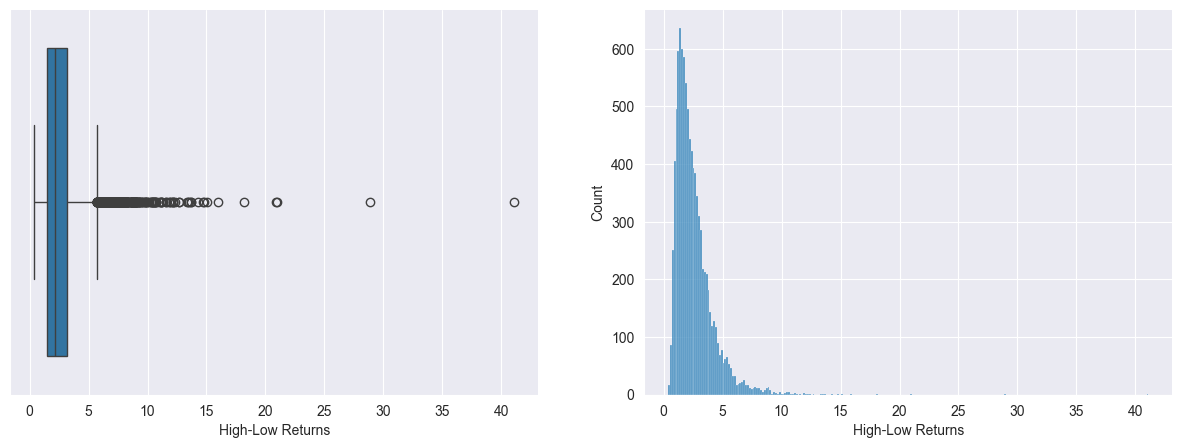

In [54]:
draw_plots(df_microsoft_daily, "High-Low Returns")

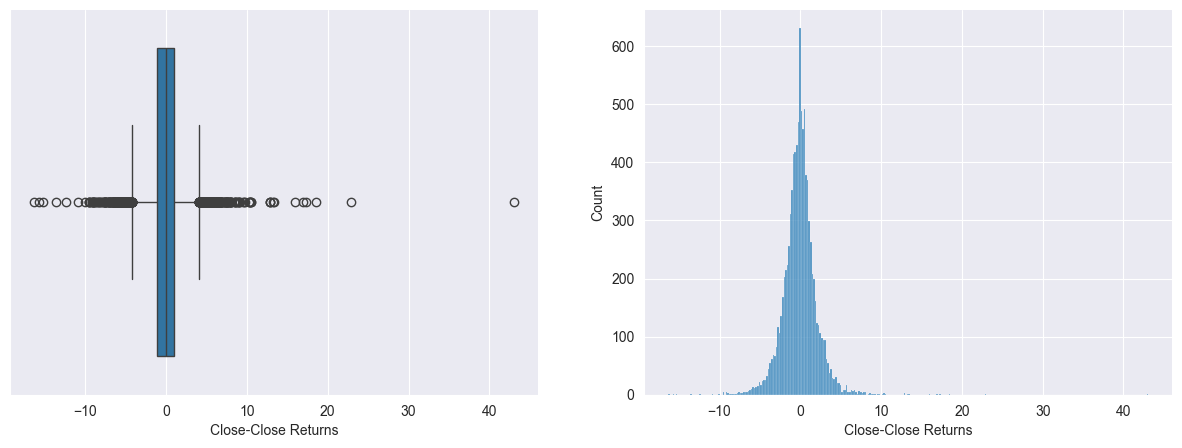

In [55]:
draw_plots(df_microsoft_daily, "Close-Close Returns")

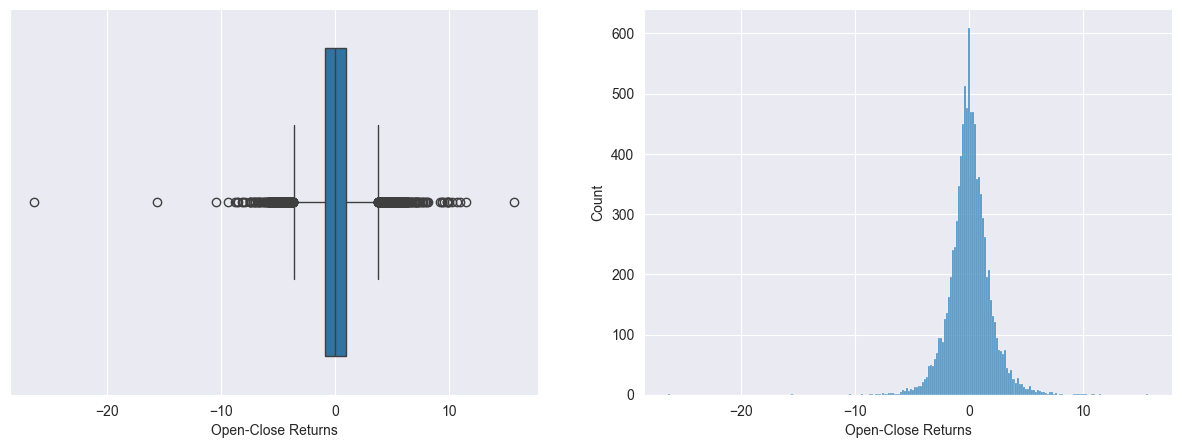

In [56]:
draw_plots(df_microsoft_daily, "Open-Close Returns")

Szczegółowa analiza wybranych cech tabeli microsoft_daily.db

Wyznaczanie współczynników
W celu wyznaczenia odpowiednich współczynników, możemy skorzystać z poniższych wzorów.

Wartość średnia: 
$m = E(X) = $
...

Nie będę natomiast korzystał z tych wzorów ponieważ, powyższe współczynniki można obliczyć przez wbudowane metody i funkcjew w bibliotekach numpy i scipy

Funckje pomocnicze

In [94]:
fun = lambda n: f'{n:.2f}'

Funckja która pomoże wyznaczyć wskaźniki położenia

In [95]:
def pos_indicators(values):
    min_ = values.min()
    max_ = values.max()
    Q1 = values.quantile(.25)
    Q3 = values.quantile(.75)
    modes_res = stats.mode(values)
    modes = modes_res[0]
    counts = modes_res[1]
    max_count = counts.max()
    
    res = [
        ('Najmniejsza wartość (min)', fun(min_)),
        ('Największa wartość (max)', fun(max_)),
        ('Średnia arytmetyczna', fun(values.mean())),
        ('Kwantyl pierwszy (Q1)', fun(Q1)),
        ('Mediana (Q2)', fun(values.median())),
        ('Kwantyl trzeci (Q3)', fun(Q3)),
    ]
    
    return res

Funkcja pozwoli obliczyć wskaźnik rozproszenia

In [81]:
def scatter_indicators(values):
    std = values.std()
    min_ = values.min()
    max_ = values.max()
    Q1 = values.quantile(.25)
    Q3 = values.quantile(.75)
    IQR = Q3 - Q1
    Q = IQR / 2
    skew = round(stats.skew(values), 2)
    skew_msg = 'prawostronnie skośny' if skew > 0 else 'lewostronnie skośny' if skew < 0 else 'symetryczny'
    excess_kurtosis = stats.kurtosis(values)
    kurtosis = excess_kurtosis + 3
    kurtosis_msg = 'leptokurtyczny' if excess_kurtosis > 0 else 'platykurtyczny' if excess_kurtosis < 0 else 'mezokurtyczny'
    
    return [
        ('Odchylenie standardowe', fun(std)),
        ('Wariancja', fun(std ** 2)),
        ('Rozstęp między skrajnymi wartościami (max - min)', fun(max_ - min_)),
        ('Rozstęp międzykwartylowy (IQR)', fun(IQR)),
        ('Odchylenie ćwiartkowe', fun(Q)),
        ('Współczynnik asymetrii (skośności)', f"{fun(skew)} ({skew_msg})"),
        ('Kurtoza', fun(kurtosis)),
        ('Współczynnik wyostrzenia', f'{fun(excess_kurtosis)} ({kurtosis_msg})')
    ]

In [109]:
def compute_intervals_probability(df, no_bins):
    return df.value_counts(normalize=True, bins=no_bins, sort=False)

In [115]:
def compute_cumulative_intervals_probability(intervals_probability):
    return intervals_probability.cumsum()

In [123]:
def count_frequency_intervals(df, no_bins):
    intervals = pd.cut(df, bins=no_bins, include_lowest=True)

    counter = bins.value_counts(sort=False)
    return counter
    

Funkcja wypisująca wyniki w postaci tabeli:

In [116]:
show_tab = lambda fn, values: print(tabulate(fn(values), []))

Dystrybucja zmiennej Close-Close Returns

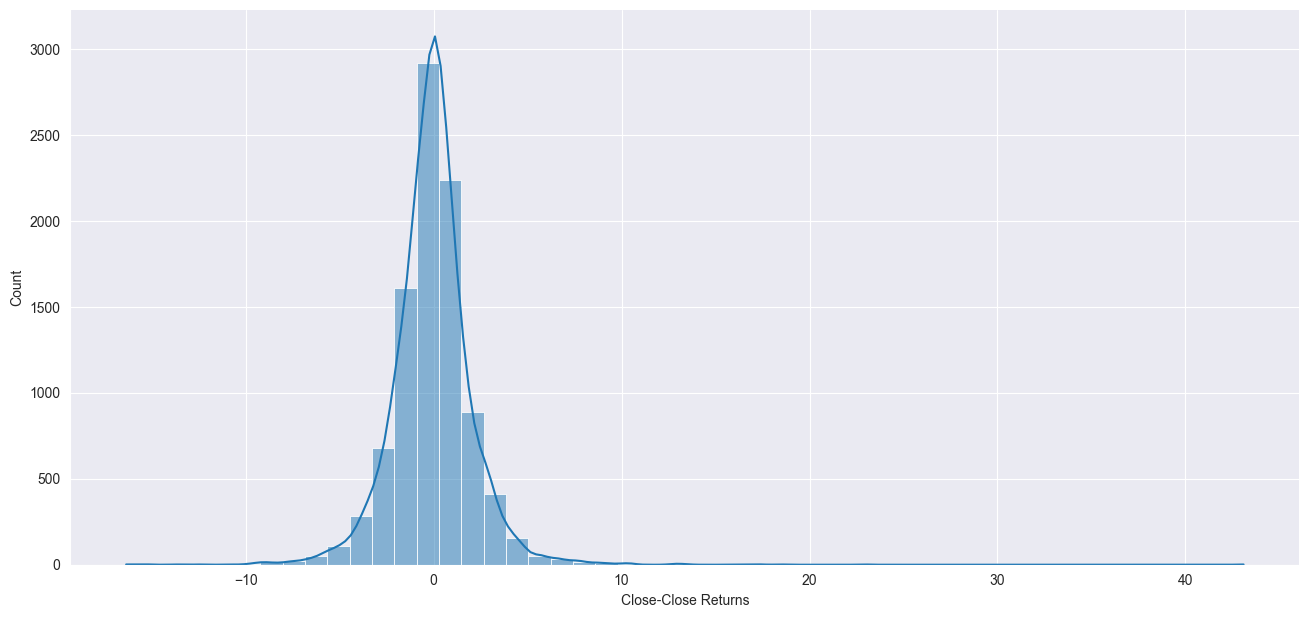

In [117]:
g = sns.displot(data=df_microsoft_daily['Close-Close Returns'], kde=True, bins=50)
g.fig.set_figwidth(15)
g.fig.set_figheight(6.5)

In [118]:
df_microsoft_daily['Close-Close Returns'] = df_microsoft_daily['Close-Close Returns'].fillna(0)

In [119]:
show_tab(pos_indicators,df_microsoft_daily['Close-Close Returns'])

-------------------------  ------
Najmniejsza wartość (min)  -16.36
Największa wartość (max)    43.09
Średnia arytmetyczna        -0.07
Kwantyl pierwszy (Q1)       -1.12
Mediana (Q2)                -0.04
Kwantyl trzeci (Q3)          0.93
-------------------------  ------


In [120]:
show_tab(scatter_indicators, df_microsoft_daily['Close-Close Returns'])

------------------------------------------------  ---------------------------
Odchylenie standardowe                            2.14
Wariancja                                         4.59
Rozstęp między skrajnymi wartościami (max - min)  59.46
Rozstęp międzykwartylowy (IQR)                    2.05
Odchylenie ćwiartkowe                             1.02
Współczynnik asymetrii (skośności)                1.18 (prawostronnie skośny)
Kurtoza                                           26.85
Współczynnik wyostrzenia                          23.85 (leptokurtyczny)
------------------------------------------------  ---------------------------


In [121]:
intervals_prob = compute_intervals_probability(df_microsoft_daily['Close-Close Returns'],20)
intervals_prob

(-16.424, -13.391]    0.000420
(-13.391, -10.418]    0.000210
(-10.418, -7.445]     0.003045
(-7.445, -4.472]      0.018165
(-4.472, -1.499]      0.169362
(-1.499, 1.474]       0.642692
(1.474, 4.447]        0.146472
(4.447, 7.419]        0.014910
(7.419, 10.392]       0.003360
(10.392, 13.365]      0.000630
(13.365, 16.338]      0.000210
(16.338, 19.311]      0.000315
(19.311, 22.284]      0.000000
(22.284, 25.257]      0.000105
(25.257, 28.23]       0.000000
(28.23, 31.203]       0.000000
(31.203, 34.175]      0.000000
(34.175, 37.148]      0.000000
(37.148, 40.121]      0.000000
(40.121, 43.094]      0.000105
Name: proportion, dtype: float64

In [122]:
compute_cumulative_intervals_probability(intervals_prob)

(-16.424, -13.391]    0.000420
(-13.391, -10.418]    0.000630
(-10.418, -7.445]     0.003675
(-7.445, -4.472]      0.021840
(-4.472, -1.499]      0.191201
(-1.499, 1.474]       0.833893
(1.474, 4.447]        0.980365
(4.447, 7.419]        0.995275
(7.419, 10.392]       0.998635
(10.392, 13.365]      0.999265
(13.365, 16.338]      0.999475
(16.338, 19.311]      0.999790
(19.311, 22.284]      0.999790
(22.284, 25.257]      0.999895
(25.257, 28.23]       0.999895
(28.23, 31.203]       0.999895
(31.203, 34.175]      0.999895
(34.175, 37.148]      0.999895
(37.148, 40.121]      0.999895
(40.121, 43.094]      1.000000
Name: proportion, dtype: float64

In [124]:
count_frequency_intervals(df_microsoft_daily['Close-Close Returns'],20)

Close-Close Returns
(-16.424, -13.391]       4
(-13.391, -10.418]       2
(-10.418, -7.445]       29
(-7.445, -4.472]       173
(-4.472, -1.499]      1613
(-1.499, 1.474]       6121
(1.474, 4.447]        1395
(4.447, 7.419]         142
(7.419, 10.392]         32
(10.392, 13.365]         6
(13.365, 16.338]         2
(16.338, 19.311]         3
(19.311, 22.284]         0
(22.284, 25.257]         1
(25.257, 28.23]          0
(28.23, 31.203]          0
(31.203, 34.175]         0
(34.175, 37.148]         0
(37.148, 40.121]         0
(40.121, 43.094]         1
Name: count, dtype: int64